In [23]:
IMAGE_SEGMENTATION_API_IP="184.172.250.9"
IMAGE_SEGMENTATION_API_PORT="30050"

In [24]:
import numpy as np


def create_pascal_label_colormap():
    """Creates a label colormap used in PASCAL VOC segmentation benchmark.

    Returns:
      A Colormap for visualizing segmentation results.
    """
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    return colormap


def label_to_color_image(label):
    """Adds color defined by the dataset colormap to the label.

    Args:
      label: A 2D array with integer type, storing the segmentation label.

    Returns:
      result: A 2D array with floating type. The element of the array
        is the color indexed by the corresponding element in the input label
        to the PASCAL color map.

    Raises:
      ValueError: If label is not of rank 2 or its value is larger than color
        map maximum entry.
    """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_pascal_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]


In [25]:
import json
import pycurl
import io

In [26]:
_IMAGE = "selfie.jpg"
_LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

In [27]:
c = pycurl.Curl()
b = io.BytesIO()
c.setopt(pycurl.URL, 'http://{}:{}/model/predict'.format(IMAGE_SEGMENTATION_API_IP, IMAGE_SEGMENTATION_API_PORT))
c.setopt(pycurl.HTTPHEADER, ['Accept:application/json', 'Content-Type: multipart/form-data'])
c.setopt(pycurl.HTTPPOST, [('image', (pycurl.FORM_FILE, _IMAGE))])
c.setopt(pycurl.WRITEFUNCTION, b.write)
c.perform()
print(c.getinfo(pycurl.RESPONSE_CODE))
c.close()

200


In [28]:
response = b.getvalue()
response = json.loads(response)

In [29]:
import matplotlib
from matplotlib import pyplot
from PIL import Image

In [30]:
image = Image.open(_IMAGE)
image = image.resize(response['image_size'])

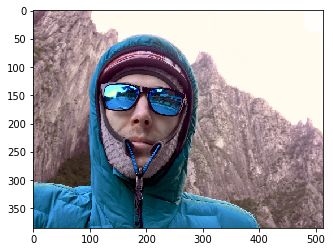

In [31]:
pyplot.imshow(image)

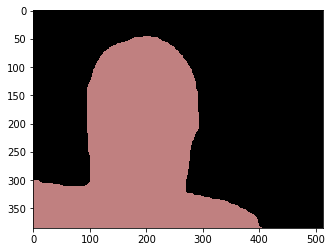

In [32]:
seg_map = np.asarray(response['seg_map'])
seg_image = label_to_color_image(seg_map).astype(np.uint8)
pyplot.imshow(seg_image)

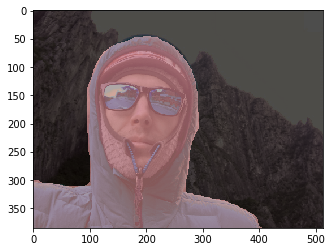

In [33]:
pyplot.imshow(image)
pyplot.imshow(seg_image, alpha=0.7)